# Decision Tree Model

Creating a decision tree model to predict the outcome of an premier league game.

## Importing Libraries

In [50]:
# ML libraries
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data processing libraries
import pandas as pd

# Visuals
#!pip install graphviz
#!pip install pydotplus
#!pip install IPython
#import graphviz
#import pydotplus
#from IPython.display import Image
from matplotlib import pyplot as plt

## Loading datasets

In [51]:
df = pd.read_csv(r"League_Result_Data/TimeEncoded_PremierLeague_Stats_From_2014to2021.csv")

## Normal Dataset (Time Isn't Included)

### Splitting data

The data with be split into training and test data to ensure the integrity and proformance of the model

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             670 non-null    int64  
 1   Season                 670 non-null    object 
 2   Season Encoding        670 non-null    int64  
 3   Date                   670 non-null    object 
 4   YearOfSeason           632 non-null    object 
 5   Time                   670 non-null    object 
 6   Time Encoding          670 non-null    int64  
 7   HomeTeam               670 non-null    object 
 8   HomeTeam Encoding      670 non-null    int64  
 9   AwayTeam               670 non-null    object 
 10  AwayTeam Encoding      670 non-null    int64  
 11  FTHG                   670 non-null    float64
 12  FTAG                   670 non-null    float64
 13  FTR                    670 non-null    object 
 14  FTR Encoding           670 non-null    int64  
 15  HTHG  

## Encodes the YearOfSeason values

In [53]:
df = df.dropna()

seasons = set(df['YearOfSeason'].values)
seasons = list(seasons)

# re-orders the list 
seasons = ['2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21']
seasons

['2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21']

In [54]:
df['YearOfSeason Encoding'] = -1

for index, value in df['YearOfSeason'].iteritems():
    
    # 2014/15: 0
    if value == seasons[0]:
        df.at[index, 'YearOfSeason Encoding'] = 0
    
    # 2015/16: 1
    if value == seasons[1]:
        df.at[index, 'YearOfSeason Encoding'] = 1
        
    # 2016/17: 2
    if value == seasons[2]:
        df.at[index, 'YearOfSeason Encoding'] = 2
    
    # 2017/18: 3
    if value == seasons[3]:
        df.at[index, 'YearOfSeason Encoding'] = 3
        
    # 2018/19: 4
    if value == seasons[4]:
        df.at[index, 'YearOfSeason Encoding'] = 4
        
    # 2019/20: 5
    if value == seasons[5]:
        df.at[index, 'YearOfSeason Encoding'] = 5
    
    # 2020/21: 6
    if value == seasons[6]:
        df.at[index, 'YearOfSeason Encoding'] = 6 

In [55]:
# Features -- Drops FTR and any categorical value 
X = df.drop(columns=["Season", "Unnamed: 0", "YearOfSeason", "Time", "Date", "FTHG", "FTAG", "HTHG", "HTAG", "HomeTeam", "AwayTeam", "Referee", "FTR", "FTR Encoding", "HTR", "Referee"])
# Labels
y = df["FTR Encoding"]

X

,Season Encoding,Time Encoding,HomeTeam Encoding,AwayTeam Encoding,Referee Encoding,Fouls Called Per Game,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,YearOfSeason Encoding
0,0,0,8,0,7,14.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,6
1,0,2,6,21,27,14.0,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,6
2,0,2,13,11,28,14.0,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,6
3,0,2,28,17,11,13.0,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,6
4,0,1,27,12,10,15.0,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,3,1,12,15,16,14.0,14.0,7.0,3.0,3.0,12.0,11.0,3.0,3.0,1.0,4.0,1.0,0.0,5
666,3,1,14,18,25,15.0,31.0,5.0,10.0,4.0,7.0,4.0,9.0,0.0,1.0,1.0,0.0,0.0,5
667,3,1,17,13,10,15.0,3.0,14.0,2.0,6.0,11.0,5.0,2.0,4.0,1.0,0.0,0.0,0.0,5
668,3,1,21,20,3,13.0,13.0,5.0,4.0,3.0,9.0,16.0,9.0,1.0,0.0,1.0,0.0,0.0,5


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 0 to 669
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season Encoding        632 non-null    int64  
 1   Time Encoding          632 non-null    int64  
 2   HomeTeam Encoding      632 non-null    int64  
 3   AwayTeam Encoding      632 non-null    int64  
 4   Referee Encoding       632 non-null    int64  
 5   Fouls Called Per Game  632 non-null    float64
 6   HS                     632 non-null    float64
 7   AS                     632 non-null    float64
 8   HST                    632 non-null    float64
 9   AST                    632 non-null    float64
 10  HF                     632 non-null    float64
 11  AF                     632 non-null    float64
 12  HC                     632 non-null    float64
 13  AC                     632 non-null    float64
 14  HY                     632 non-null    float64
 15  AY    

In [57]:
X

,Season Encoding,Time Encoding,HomeTeam Encoding,AwayTeam Encoding,Referee Encoding,Fouls Called Per Game,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,YearOfSeason Encoding
0,0,0,8,0,7,14.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,6
1,0,2,6,21,27,14.0,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,6
2,0,2,13,11,28,14.0,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,6
3,0,2,28,17,11,13.0,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,6
4,0,1,27,12,10,15.0,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,3,1,12,15,16,14.0,14.0,7.0,3.0,3.0,12.0,11.0,3.0,3.0,1.0,4.0,1.0,0.0,5
666,3,1,14,18,25,15.0,31.0,5.0,10.0,4.0,7.0,4.0,9.0,0.0,1.0,1.0,0.0,0.0,5
667,3,1,17,13,10,15.0,3.0,14.0,2.0,6.0,11.0,5.0,2.0,4.0,1.0,0.0,0.0,0.0,5
668,3,1,21,20,3,13.0,13.0,5.0,4.0,3.0,9.0,16.0,9.0,1.0,0.0,1.0,0.0,0.0,5


In [58]:
"""
Target Varible - Full Time Results
0 - Home Team Win
1 - Away Team Win
2 - Draw
"""
y

0      1
1      0
2      0
3      1
4      1
      ..
665    1
666    0
667    1
668    0
669    2
Name: FTR Encoding, Length: 632, dtype: int64

In [59]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
# Scaling varibles to unit variance
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Fitting the model

Fitting the data to a decision tree model

### Assigns Weights

In [62]:
#weights = {
#    0:
#}

In [63]:
# Declaring the decision tree classifier
tree_clf = tree.DecisionTreeClassifier(max_leaf_nodes = 15, 
                                      max_features=10,
                                      random_state=42,
                                      min_samples_split=3,
                                      max_depth=10,
                                       criterion='entropy'
                                      )

# Training the decision tree
clf_train = tree_clf.fit(X_train, y_train)

In [64]:
score = clf_train.score(X_test, y_test)

print(score)

0.49606299212598426


In [65]:
# Confusion Matrix

cv_score = cross_val_score(clf_train, X_train, y_train, cv=3, scoring='accuracy')

print(cv_score, '\n')

y_train_pred = cross_val_predict(clf_train, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_train_pred))

[0.50295858 0.44642857 0.48809524] 

[[115  56  39]
 [ 40 102  35]
 [ 40  53  25]]


In [66]:
# Precision, Recall, F1

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       210
           1       0.48      0.58      0.53       177
           2       0.25      0.21      0.23       118

    accuracy                           0.48       505
   macro avg       0.44      0.45      0.44       505
weighted avg       0.47      0.48      0.47       505



## Visualizing the tree

Create visual plots for the decision tree

In [67]:
fn = list(X.columns)
cn ='0', '1', '2'

In [68]:
cn

('0', '1', '2')

[Text(226.4823529411765, 203.85, 'X[9] <= 0.586\ngini = 0.65\nsamples = 505\nvalue = [210, 177, 118]'),
 Text(177.24705882352941, 176.67000000000002, 'X[9] <= 0.168\ngini = 0.623\nsamples = 376\nvalue = [189, 90, 97]'),
 Text(157.5529411764706, 149.49, 'X[8] <= -0.008\ngini = 0.61\nsamples = 317\nvalue = [166, 64, 87]'),
 Text(78.7764705882353, 122.31, 'X[8] <= -1.2\ngini = 0.659\nsamples = 145\nvalue = [46, 41, 58]'),
 Text(39.38823529411765, 95.13, 'X[15] <= -0.102\ngini = 0.545\nsamples = 20\nvalue = [1, 9, 10]'),
 Text(19.694117647058825, 67.94999999999999, 'gini = 0.245\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(59.082352941176474, 67.94999999999999, 'gini = 0.521\nsamples = 13\nvalue = [1, 8, 4]'),
 Text(118.16470588235295, 95.13, 'X[4] <= 1.467\ngini = 0.657\nsamples = 125\nvalue = [45, 32, 48]'),
 Text(98.47058823529412, 67.94999999999999, 'X[7] <= 0.626\ngini = 0.651\nsamples = 115\nvalue = [39, 28, 48]'),
 Text(78.7764705882353, 40.77000000000001, 'gini = 0.648\nsamples = 104\n

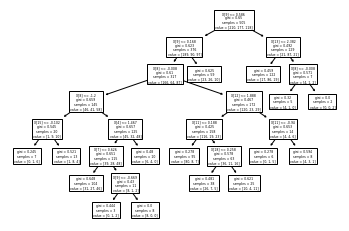

In [69]:
tree.plot_tree(clf_train)

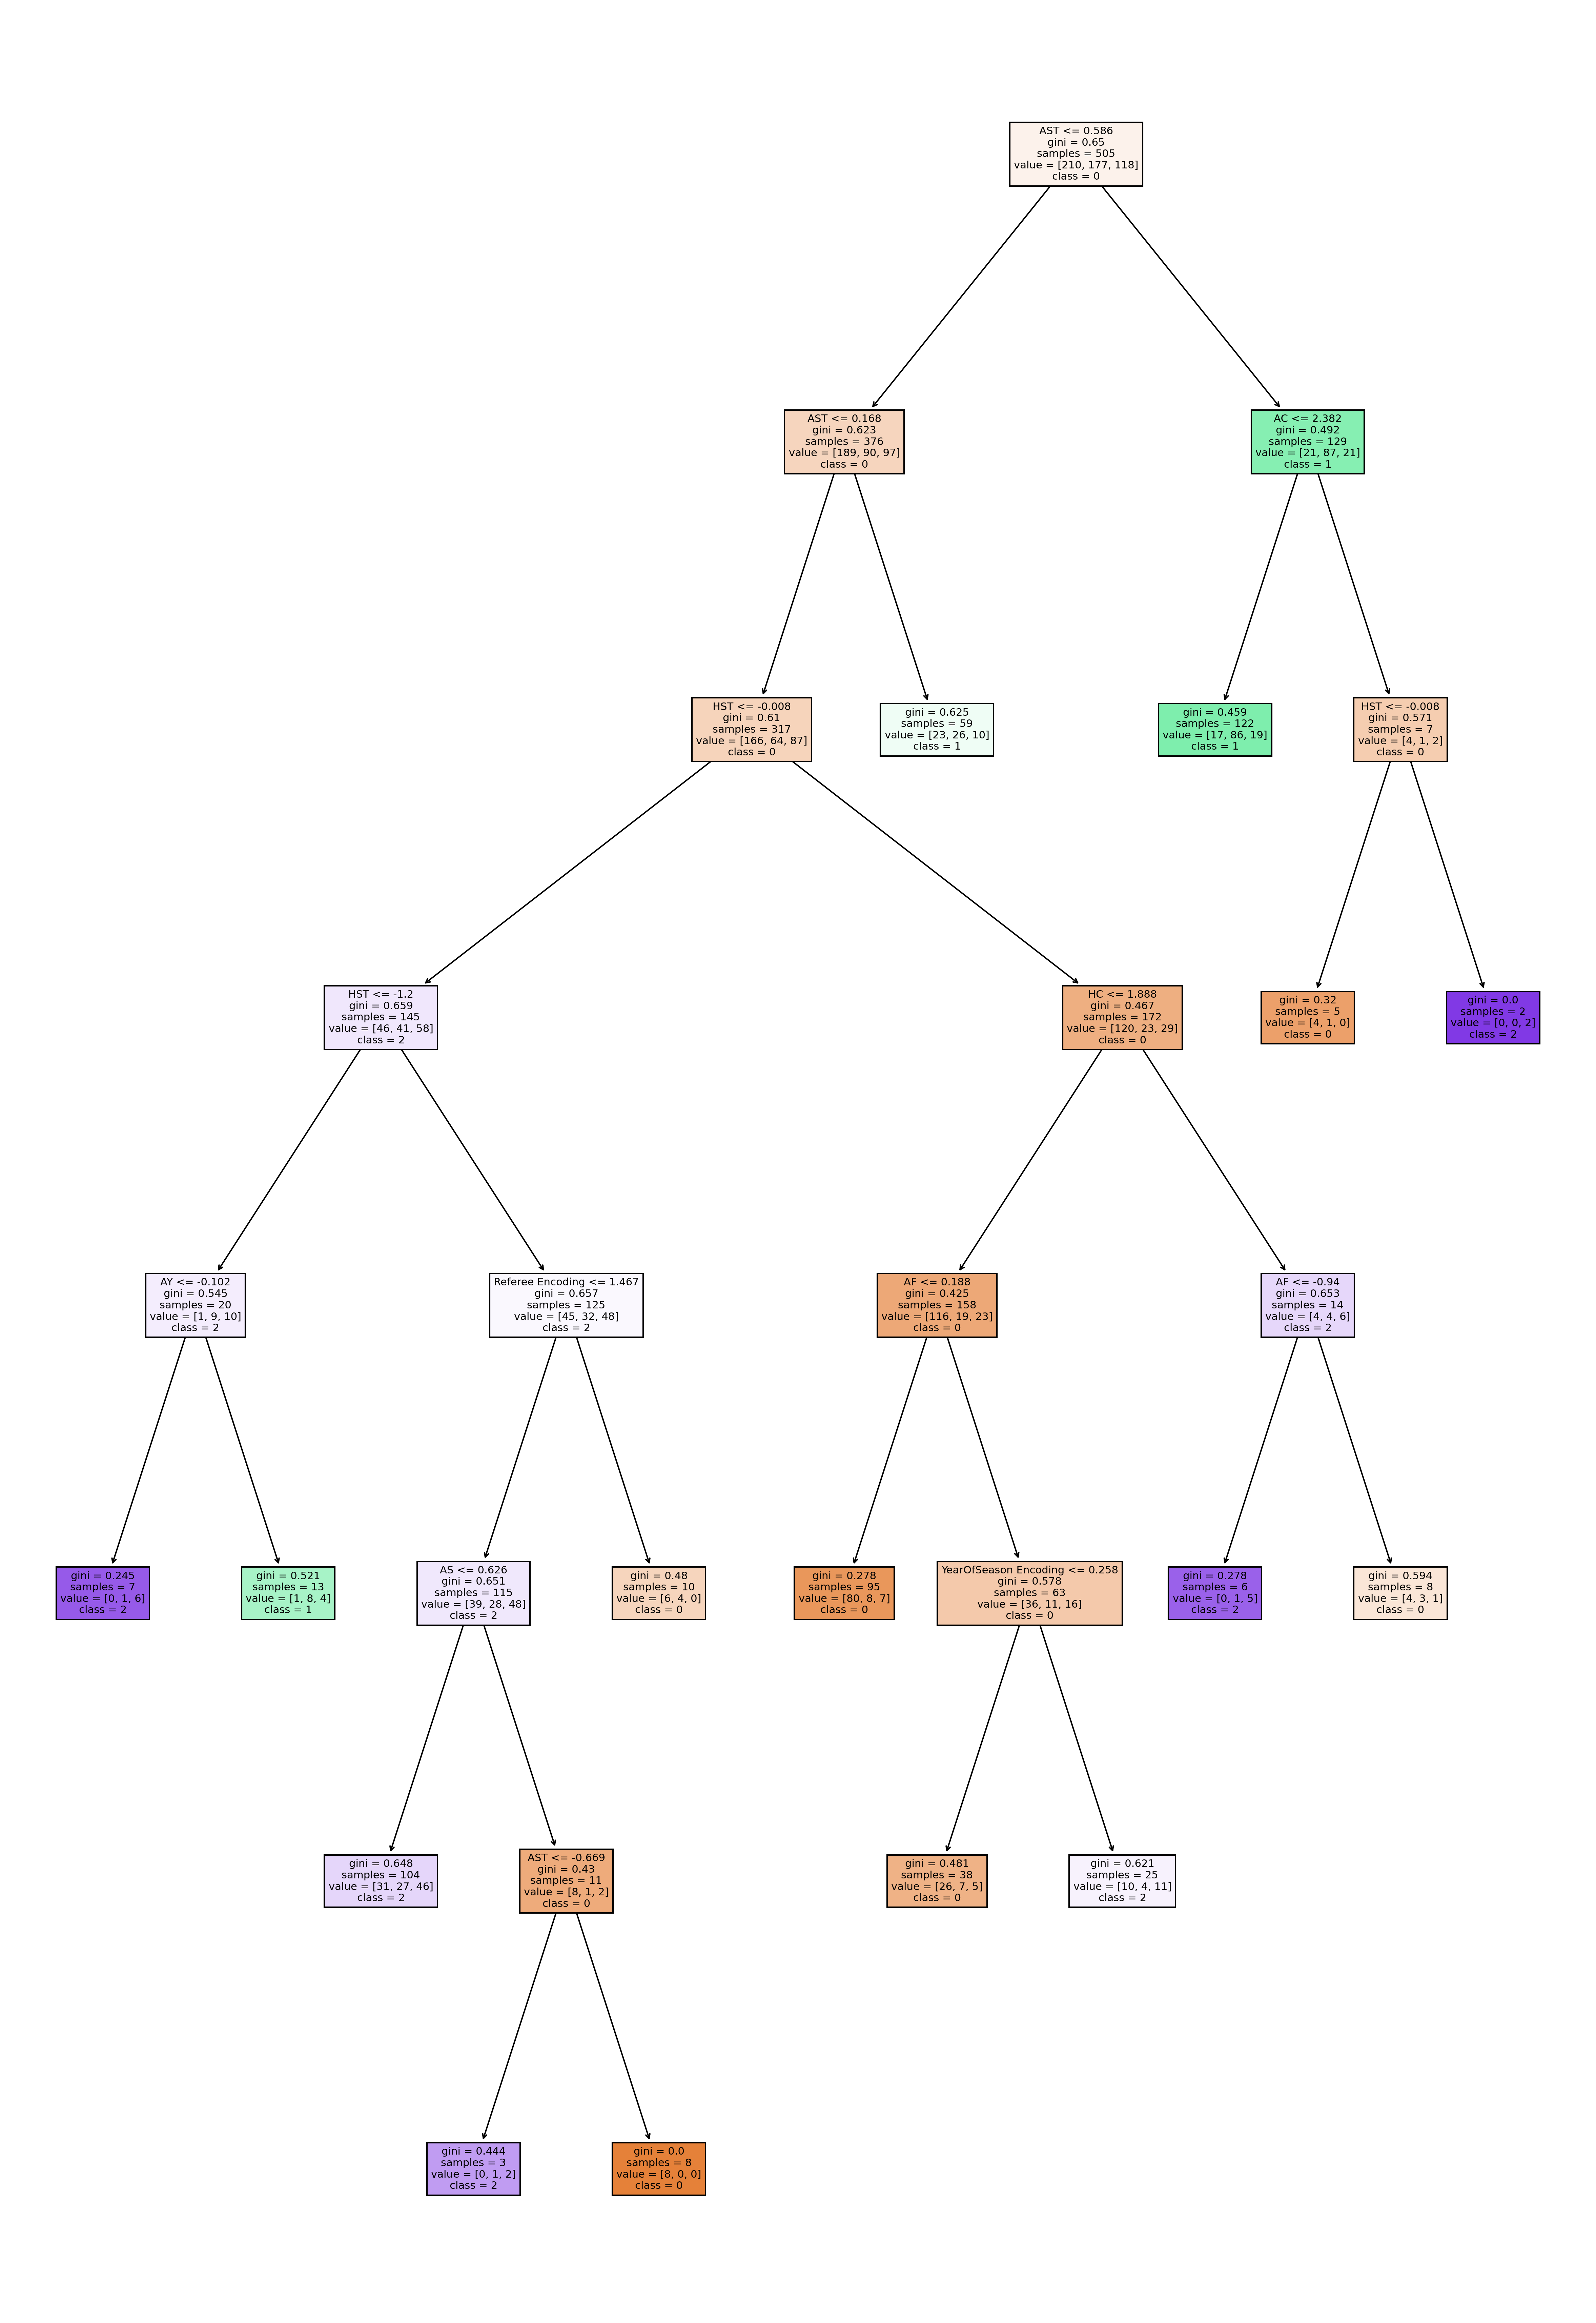

In [70]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,30), dpi=300)
tree.plot_tree(
    clf_train,
    feature_names = fn, 
    class_names=cn,           
    filled = True);

# 0 = Home win
# 1 = Away win
# 2 = Draw

Helpful link: https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d